<a href="https://colab.research.google.com/github/ch3rnoalpha/Sales_predictions---john-paredes/blob/main/Project_core_5_John_paredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project core 5

John paredes

In [2]:
#imports drive and mounts it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
###################################################
# ML imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import set_config
####################################################
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
set_config(display='diagram')

In [ ]:
#sets filepath as file name and creates dataframe
filename = '/content/drive/MyDrive/CodingDojo/Data files/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

In [6]:
#drops na data
df.dropna(inplace = True)

In [7]:
df.drop_duplicates(inplace=True)

In [ ]:
#shows the shape of the dataframe
df.shape

In [ ]:
#shows data types
df.dtypes

In [ ]:
#shows thats null
df.isnull().sum()

In [ ]:
################################################################################################################################
#Beginning of train test split

In [9]:
# Split
X = df.drop(columns = ['Item_Outlet_Sales','Item_Identifier'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [11]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

In [ ]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

In [ ]:
#fit on train
preprocessor.fit(X_train)

In [17]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Obtain descriptive statistics of your features
X_train.describe().round(0)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded - Pulled this from reading
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

In [ ]:
# End of train test split
################################################################################################################################

In [ ]:
#shows unique values for outlet size column
df['Outlet_Size'].unique()

In [ ]:
#fills missing strings with new catagory then verifys data is filled
df['Outlet_Size'].fillna(('unknown'), inplace = True)
print(df.isnull().sum())

In [ ]:
#shows sum of unique values per column
df.nunique()

In [ ]:
#shows datatypes of all comuns
df.dtypes

In [ ]:
#Goes through data. setting all strings to lowercase to get rid of inconsistent categories of data
for col in df.columns:
  if df[col].dtypes == object:
    df[col] = df[col].str.lower()
df

In [ ]:
df.select_dtypes('object').value_counts() 

In [ ]:
#====================================================================================================================================

In [ ]:
#checks for catagorical data errors

In [ ]:
df['Item_Identifier'].value_counts() 

In [ ]:
df['Item_Fat_Content'].value_counts() 

In [ ]:
df['Item_Type'].value_counts() 

In [ ]:
df['Outlet_Identifier'].value_counts() 

In [ ]:
df['Outlet_Size'].value_counts() 

In [ ]:
df['Outlet_Location_Type'].value_counts() 

In [ ]:
df['Outlet_Type'].value_counts() 

In [ ]:
#====================================================================================================================================

In [ ]:
# corrects catagorical data errors

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('lf', 'low fat');

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('regularularular', 'regular');
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('regularular', 'regular');

In [ ]:
#====================================================================================================================================

In [ ]:
#prints info on colums that are numerical (float or int)
for col in df.columns:
  if df[col].dtypes == float or  df[col].dtypes == int:
    print(df[col].describe())


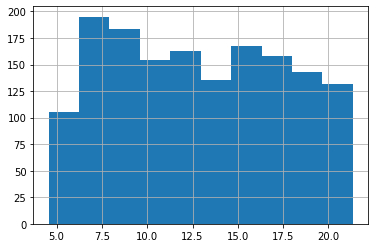

In [ ]:
# Histogram of item weights
df['Item_Weight'].hist()
plt.ticklabel_format(useOffset=False, style='plain')

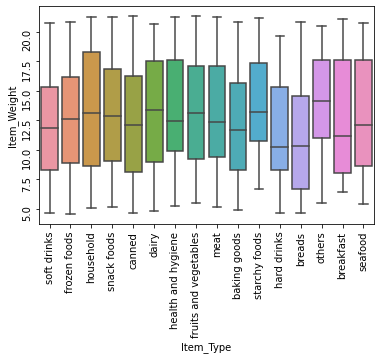

In [ ]:
#Boxplot of item type compared to item weight, shows overall averages
ax = sns.boxplot(x='Item_Type', y='Item_Weight', data=df)
ax.tick_params(labelrotation=90)

In [ ]:
#creates a correlation chart of all numerical imputs for the df
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.007985,0.035369,0.006123,-0.012152
Item_Visibility,-0.007985,1.000000,-0.010080,0.036566,0.007173
Item_MRP,0.035369,-0.010080,1.000000,-0.002681,0.689978
Outlet_Establishment_Year,0.006123,0.036566,-0.002681,1.000000,-0.045511
Item_Outlet_Sales,-0.012152,0.007173,0.689978,-0.045511,1.000000


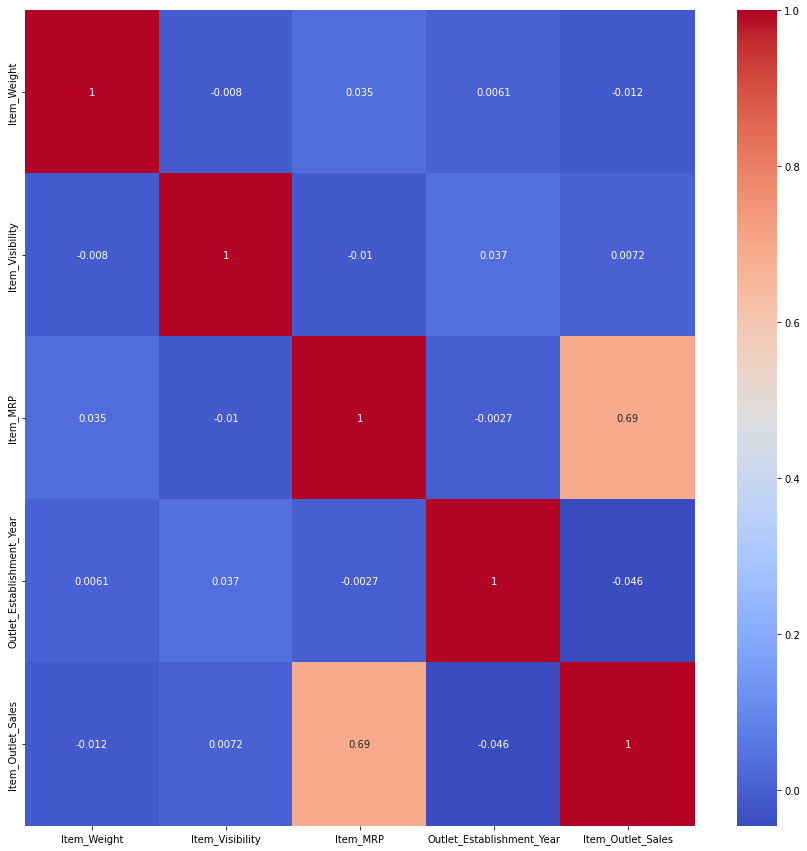

In [ ]:
#creates a basic heatmap comparing numerical datapoints, looks for correlations
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
#creates a mean index of outlet year established
line_df = df.groupby('Outlet_Establishment_Year').mean()
line_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1987,12.898129,0.058036,140.523399,2329.063514
1997,12.547145,0.056946,146.858170,2303.534840
1999,12.978506,0.059173,136.977142,2284.068266
2004,12.610144,0.063447,139.758393,2424.341245
2009,13.047136,0.061437,141.581834,2034.265515


Text(0.5, 1.0, 'Sales compared to Outlet established year')

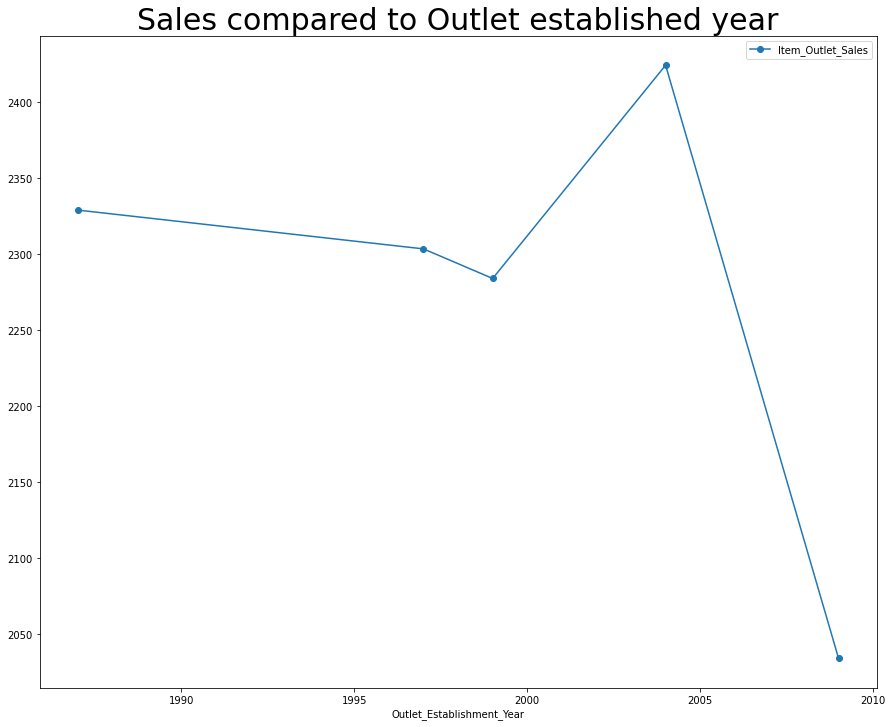

In [ ]:
#Plots item sales vs outlet year established
line_df.plot(y=['Item_Outlet_Sales'], subplots=True, marker='o', figsize=(15,12));
plt.title('Sales compared to Outlet established year', fontsize=30)

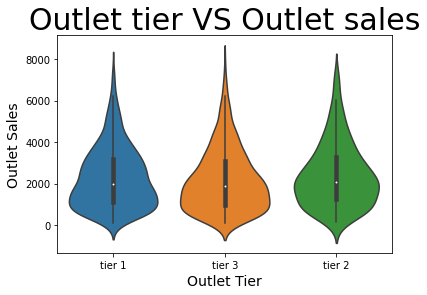

In [ ]:
#creates violin boxplot to show outlet tier vs sales
boxplot = sns.violinplot(data=df, x='Outlet_Location_Type',y='Item_Outlet_Sales')


boxplot.axes.set_title("Outlet tier VS Outlet sales", fontsize=30)
boxplot.set_ylabel("Outlet Sales", fontsize=14)
boxplot.set_xlabel("Outlet Tier", fontsize=14);

In [ ]:
##############################################################################################################################################################################################

# start of Liner regression

In [ ]:
X_train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_baking goods,Item_Type_breads,Item_Type_breakfast,Item_Type_canned,...,Outlet_Identifier_out046,Outlet_Identifier_out049,Outlet_Size_high,Outlet_Size_medium,Outlet_Size_small,Outlet_Location_Type_tier 1,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2
0,8.75,0.074565,186.8556,1987,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,15.00,0.118792,229.9694,1987,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,15.25,0.061185,132.0968,1997,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,18.35,0.014024,224.5746,1997,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,8.85,0.053951,182.7292,1999,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
y = df['Item_Outlet_Sales']
X = X_train_df

In [ ]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_baking goods,Item_Type_breads,Item_Type_breakfast,Item_Type_canned,...,Outlet_Identifier_out046,Outlet_Identifier_out049,Outlet_Size_high,Outlet_Size_medium,Outlet_Size_small,Outlet_Location_Type_tier 1,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2
0,8.75,0.074565,186.8556,1987,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,15.00,0.118792,229.9694,1987,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,15.25,0.061185,132.0968,1997,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,18.35,0.014024,224.5746,1997,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,8.85,0.053951,182.7292,1999,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
y.head()

34     2085.2856
270    1428.1410
348    3142.5760
354    1255.6988
390    2552.6772
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ValueError: ignored

In [ ]:
# Make a linear regression instance
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)
#Now that the model has "learned" the patterns, it is time to see how well it is able to make predictions.  

In [ ]:
#Measuring Model Performance
train_score = reg.score(X_train, y_train)
print(train_score)

0.4754493652070423


In [ ]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.4810323675967877


In [ ]:
# To obtain the predictions of the train set
train_preds = reg.predict(X_train)
# To obtain the predictions of the test set
test_preds = reg.predict(X_test)

In [ ]:
# Coefficient of Determination (r^2): This is the value given when you use model.score(X,y).  
# Alternately, you can use the sklearn function r2_score() with actual y values and predicted y-values. 

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [ ]:
# Root mean squared error (RMSE): square root of the mean of the squared errors. Similar to MSE, but more popular as it is seen as easier to understand than MSE.   

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print(r2_train)

0.4754493652070423


In [ ]:
print(r2_test)

0.4810323675967877


In [ ]:
print(rmse_train)

1079.163878416032


In [ ]:
print(rmse_test)

1071.6079018886523


In [ ]:
##############################################################################################################################################################################################

# End of Liner regression

In [ ]:
##############################################################################################################################################################################################

# Start of tree model

In [ ]:
y = df['Item_Outlet_Sales']

X = df.drop(columns = ['Item_Outlet_Sales','Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type', ])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [ ]:
# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
-0.16858362076058775


In [ ]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# depth of our default tree
dec_tree.get_depth()

24

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

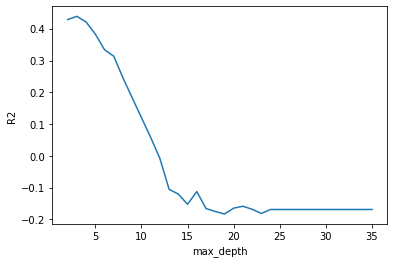

In [ ]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
# Let's run the model with our optimized value for max_depth
dec_tree_9 = DecisionTreeRegressor(max_depth = 4, random_state = 42)
dec_tree_9.fit(X_train, y_train)
train_9_score = dec_tree_9.score(X_train, y_train)
test_9_score = dec_tree_9.score(X_test, y_test)
print(train_9_score)
print(test_9_score)

0.5178425396204489
0.42120976758299444


In [ ]:
##############################################################################################################################################################################################

# End of tree model

# **Question 3**

R2 has a closer range than doing the regression tree, while the tree has a higher training score but a lower test score.

Id choose the r2 linear regression model due to its closer test/train score, alowing for more accurate results.